In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from pywaffle import Waffle
from flexitext import flexitext
from matplotlib import font_manager
import numpy as np

## Load data

In [2]:
df = pd.read_excel("LA_and_Regional_Spreadsheet_2022-23_for_Web_revised.xlsx", sheet_name="Table_1", skiprows=3)

## Prepare

In [33]:
# create %  --------------------------
df["household_waste_not_recycled_perc"] = round(df["Household - waste not sent for recycling (tonnes)"]/df["Household - total waste (tonnes)"]*100,0)
df["household_waste_recycled_dry_perc"] = round(df["Household dry recycling-reuse (tonnes)"]/df["Household - total waste (tonnes)"]*100,0)
df["household_waste_recycled_green_perc"] = round(df["Household green recycling-reuse (tonnes)"]/df["Household - total waste (tonnes)"]*100, 0)
df["household_waste_not_recycled_perc_est"] = 100 - df["household_waste_recycled_dry_perc"] - df["household_waste_recycled_green_perc"]
df["household_waste_recycled_perc"] = round(df["Household - waste sent for recycling-composting-reuse (tonnes)"]/df["Household - total waste (tonnes)"]*100, 0)

# dictionaty to map display names to ONS codes  -----------------------------------
display_dict = {'E09000007': 'CMD', 'E09000001': 'CTY', 'E09000012': 'HCK', 'E09000013': 'HMS', 'E09000014': 'HGY',
             'E09000019': 'ISL', 'E09000020': 'KNS', 'E09000022': 'LAM', 'E09000023': 'LSH', 'E09000025': 'NWM',
             'E09000028': 'SWR', 'E09000030': 'TOW', 'E09000032': 'WNS', 'E09000033': 'WST', 'E09000002': 'BAR',
             'E09000003': 'BRN', 'E09000004': 'BXL',  'E09000005': 'BRT',  'E09000006': 'BRM',  'E09000008': 'CRD',
             'E09000009': 'ELG',  'E09000010': 'ENF',  'E09000011': 'GRN',  'E09000015': 'HRW',  'E09000016': 'HVG',
             'E09000017': 'HDN',  'E09000018': 'HNS',  'E09000021': 'KNG',  'E09000024': 'MRT',  'E09000026': 'RDB',
             'E09000027': 'RCH',  'E09000029': 'STN',  'E09000031': 'WTH'}
df["Display_name"] = df["ONS Code"].map(display_dict)

# define tile grid layout  -------------------------------------------
layout = [
            ["___","___","___","___","ENF","___","___","___"],
            ["___","___","HRW","BRN","HGY","WTH","___","___"],
            ["HDN","ELG","BRT","CMD","ISL","HCK","RDB","HVG"],
            ["HNS","HMS","KNS","WST","CTY","TOW","NWM","BAR"],
            ["___","RCH","WNS","LAM","SWR","LSH","GRN","BXL"],
            ["___","___","KNG","MRT","CRD","BRM","___","___"],
            ["___","___","___","STN","___","___","___","___"],
            ]

In [20]:
# load fonts -------------------------------------------
label_font = font_manager.FontProperties(fname='C:\\WINDOWS\\Fonts\\Roboto-Regular.ttf')
title_font = font_manager.FontProperties(fname='C:\\Windows\\Fonts\\LilitaOne-Regular.ttf')

## Visualise

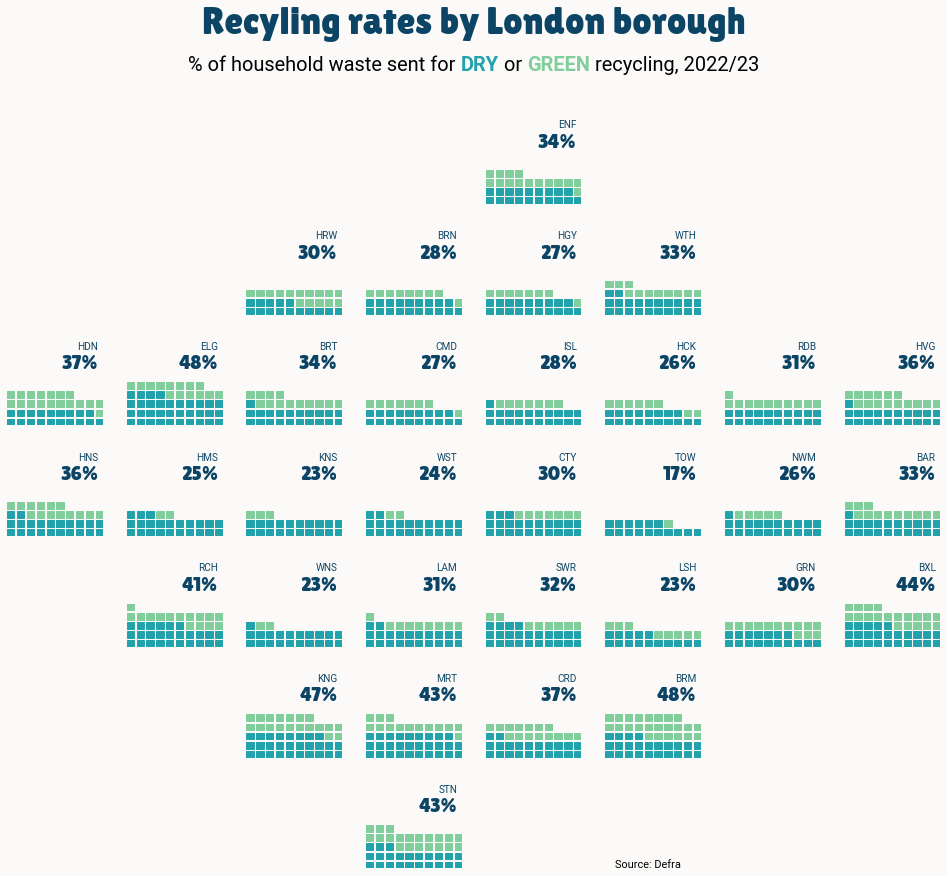

In [42]:
# data  ---------------------
_filter = (df["Region"] == "London") & (df["Authority type"]!="Disposal") & (df["Financial Year"]=="2022-23")
data = df[_filter]

# setup ------------------------------------------
colors = {"dry": "#22A2AA", "green": "#81CE9C", "none": "#fbfaf9", "value": "#0B4465", "bg": "#fbfaf9"}
columns =  ['household_waste_recycled_dry_perc',
            'household_waste_recycled_green_perc',
            'household_waste_not_recycled_perc_est']

# layout -------------------------------
scale_factor = 1.8
fig,axs = plt.subplot_mosaic(layout, figsize=(8*scale_factor,7*scale_factor), empty_sentinel="___") 
plt.subplots_adjust(wspace=0.25, hspace=0.25, left=0.05, right=0.95, bottom=0.05)
fig.set_facecolor(colors["bg"])

# plot data ---------------------------------------
for ax in axs:
    data_filtered = data[data["Display_name"]==ax]
    y_values = data_filtered[columns].values.tolist()[0]
    Waffle.make_waffle(ax=axs[ax], rows=10, values=y_values, colors=[colors["dry"], colors["green"], colors["none"]], 
                       interval_ratio_x=0.35, interval_ratio_y=0.35, vertical=True, zorder=1)
    
    #display % value and borough
    axs[ax].text(0.95,0.8,str(int(y_values[0] + y_values[1]))+"%", ha="right", va='top', fontsize=20,
                 color=colors["value"], fontproperties=title_font)
    axs[ax].text(0.95, 0.95, ax, fontsize=10, ha="right", va='top',color=colors["value"], zorder=3, fontproperties=label_font)
    
# title and footer --------------------------------
fig.text(0.5, 1, "Recyling rates by London borough", fontsize=38, ha='center',va="top",
            fontweight="bold",  fontproperties=title_font, color=colors["value"])
fig.text(0.7, 0.055, "Source: Defra", fontsize=11, ha='right', va="center",
        fontweight="normal",  fontproperties=label_font, linespacing=1.5, color="black")
subtitle = ("<name:Roboto><size:20>% of household waste sent for "
    "<color:#22A2AA, weight:bold>DRY</> or <color:#81CE9C, weight:bold>GREEN</> recycling, 2022/23</></>")
flexitext(0.5, 1-0.075, subtitle, va="bottom", ha="center", xycoords="figure fraction")

#save output ----------------------
plt.savefig("London-boroughs-recycling-rates-2022-23.png", bbox_inches='tight', transparent=False, pad_inches=1)

plt.show()

## Playground

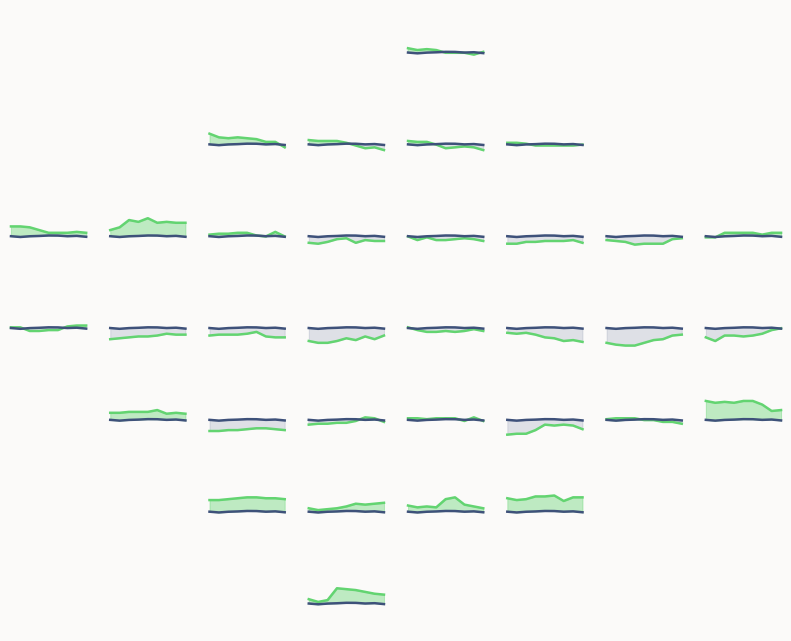

In [43]:
# setup ----------------------------------
colors = {"values": "#63D471", "baseline": "#3E517A",  "bg": "#fbfaf9"}

# layout -----------------------------------
scale_factor = 1.5
fig,axs = plt.subplot_mosaic(layout, figsize=(8*scale_factor,7*scale_factor), empty_sentinel="___") 
plt.subplots_adjust(wspace=0.2, hspace=0.2, left=0.05, right=0.95, bottom=0.05)
fig.set_facecolor(colors["bg"])

# data  ---------------------
_filter = (df["Region"] == "London") & (df["Authority type"]!="Disposal") 
data = df[_filter]
variable = "household_waste_recycled_perc"
x_values = np.array([1,2,3,4,5,6,7,8,9])
height = data[variable].max() + 30
baseline = data.groupby(["Financial Year"])[variable].mean().values

# plot data ----------------------------------------
for ax in axs:
    data_filtered = data[data["Display_name"]==ax]
    y_values=data_filtered[variable].values
    axs[ax].plot(x_values, y_values, zorder=2, color=colors["values"], linewidth=2.5)
    axs[ax].plot(x_values, baseline, zorder=2, color=colors["baseline"], linewidth=2.5)
    axs[ax].fill_between(x_values, baseline, y_values, where=baseline>y_values, interpolate=True, alpha=0.15, color=colors["baseline"])
    axs[ax].fill_between(x_values, baseline, y_values, where=y_values>baseline, interpolate=True, alpha=0.4, color=colors["values"])
    axs[ax].set_ylim(ymax=height, ymin=0)
    axs[ax].axis("off")




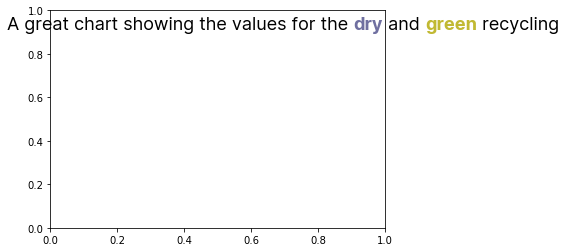

In [321]:
from flexitext import flexitext

text = (
    "<name:Inter><size:18>A great chart showing the values for the "
    "<color:#6f6fa0, weight:bold>dry</> and <color:#c1b933, weight:bold>green</> recycling</></>"
)
flexitext(0.025, 0.8, text, va="bottom", xycoords="figure fraction");

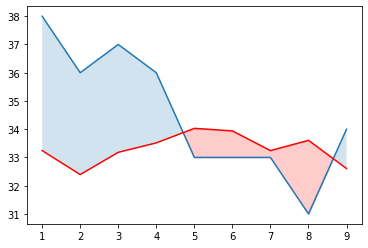

In [183]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([1,2,3,4,5])
y1 = np.array([0, 2,-3,4,-2])
y2 = np.array([2,-3,-2,-5,5])

x=np.array(x_values)
y1=np.array(y_values)
y2 = np.array(baseline)

plt.plot(x,y1)
plt.plot(x,y2, color="red")
plt.fill_between(x, y2, y1, where=y1>y2, interpolate=True, alpha=0.2)
plt.fill_between(x, y2, y1, where=y2>y1, interpolate=True, alpha=0.2, color="red")
plt.show()